<a href="https://colab.research.google.com/github/pjbds/Analisis-de-rendimiento/blob/main/An%C3%A1lisis_del_impacto_de_la_privaci%C3%B3n_m%C3%BAltiple_en_los_rendimiento_econ%C3%B3mico_de_los_estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
file = "/content/drive/MyDrive/Data Sets/Option_B_clustering - Option_B_clustering.csv"
df= pd.read_csv(file)

In [ ]:
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


Veamos cómo vienen nuestros datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


In [ ]:
df.duplicated().sum()

7

In [ ]:
((7*100)/12737)

0.054957996388474525

Tenemos siete datos duplicados y podemos ver que no hay ninguna característica única para cada estudiante, por lo tanto, es posible que existan estos casos donde tienen dos estudiantes distintos los mismos datos. Este es un escenario poco probable y vemos que el porcentaje de duplicados refleja algo muy inusual ya que es sólo el 0.055% de los estudiantes.

In [ ]:
df["gender"].unique()

array([1, 0])

Esta columna tiene sólo dos valores como debe ser(acorde a la biología y sin entrar en el debate político actual respecto de este tema)

<ipython-input-9-197287de2ca9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df["gender"].unique())


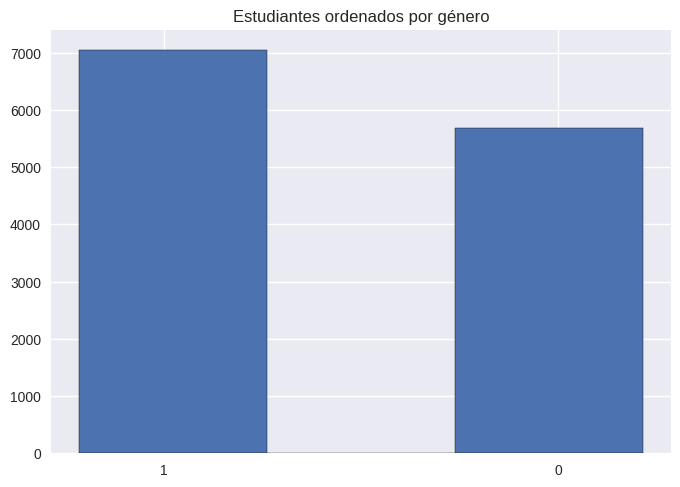

In [ ]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots()
df["gender"].hist(bins = 3, edgecolor="black")
ax.set_xticklabels(df["gender"].unique())
ax.set_xticks(ticks=[0.15, 0.85])
ax.set_title("Estudiantes ordenados por género")
plt.show();

Podemos ver que tenemos más estudiantes del género 1 que del género 0. Esto habrá que traducirlo a la hora de presentar los datos a los géneros a los que estén asignados estos valores o esta información pierde sentido. Dado que estos datos serán usados para modelar y sabemos que hay un porcentaje mayor de mujeres que de hombres en Chile([Fuente](https://datosmacro.expansion.com/demografia/estructura-poblacion/chile#:~:text=Chile%20cuenta%20con%20una%20poblaci%C3%B3n,ligeramente%20superior%20a%20la%20masculina.)), vamos a tomar 1 como femenino y 0 como masculino

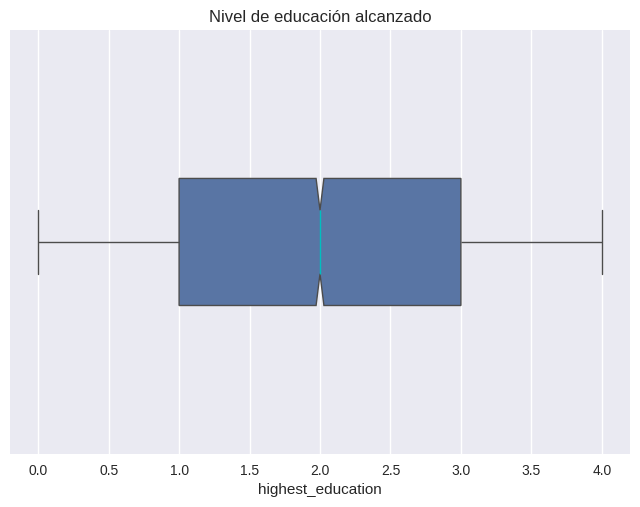

In [ ]:
sns.boxplot(x=df["highest_education"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Nivel de educación alcanzado")

plt.show();


Tenemos aquí la forma en la que se reparten los datos, vemos un distribución muy pareja, con la media y la mediana el mismo punto, sin outliers. No sabemos a qué nivel educativo corresponde cada nivel.

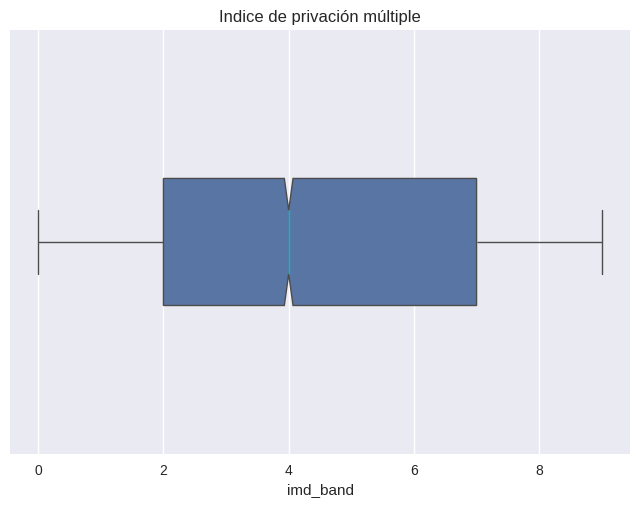

In [ ]:
sns.boxplot(x=df["imd_band"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Indice de privación múltiple")

plt.show();


Podemos observar que no tenemos valores outliers y que tenemos más valores altos que bajos, lo que nos habla de estudiantes con menos índice de privación

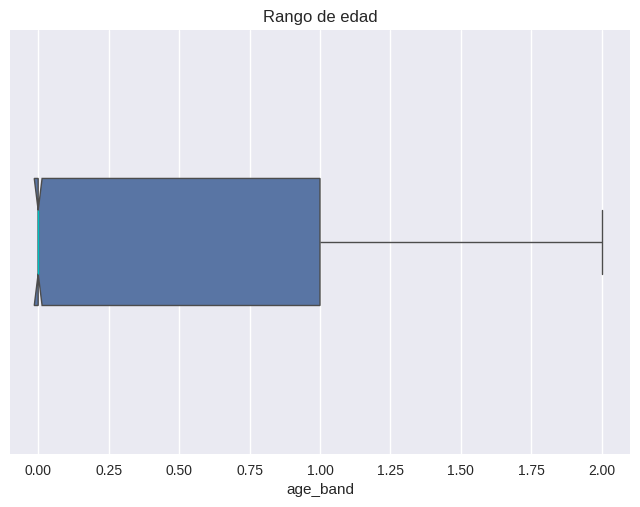

In [ ]:
sns.boxplot(x=df["age_band"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Rango de edad")

plt.show();

Se observa una alta concentración de los datos a la izquierd, con la media en 0 y con la mayoría de los estudiantes repartidos entre 0 y 1. No sabemos entre qué edades está definido cada rango

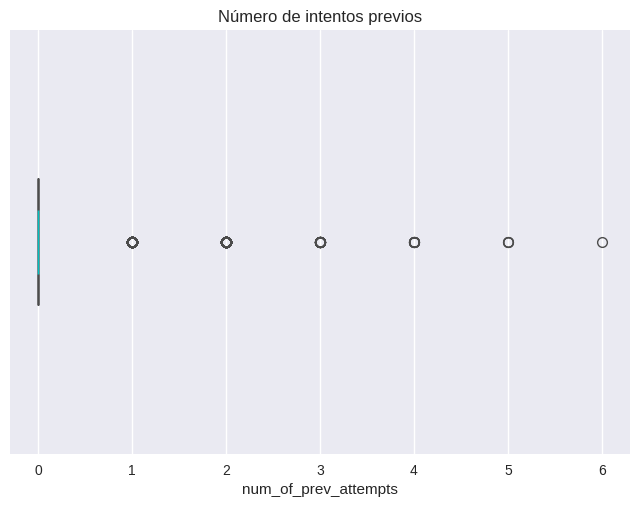

In [ ]:
sns.boxplot(x=df["num_of_prev_attempts"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Número de intentos previos")

plt.show();

Podemos ver una alta concentración de los datos, la mediana y toda la caja en cero mientras que tenemos valores outliers que van decreciendo en cantidad a medida que aumenta el número de intentos. Dado el contexto del dataset, podemos suponer que el número de intentos hace referencia a la cantidad de veces que se tomó el exámen para aprobar el curso y/o el curso completo.

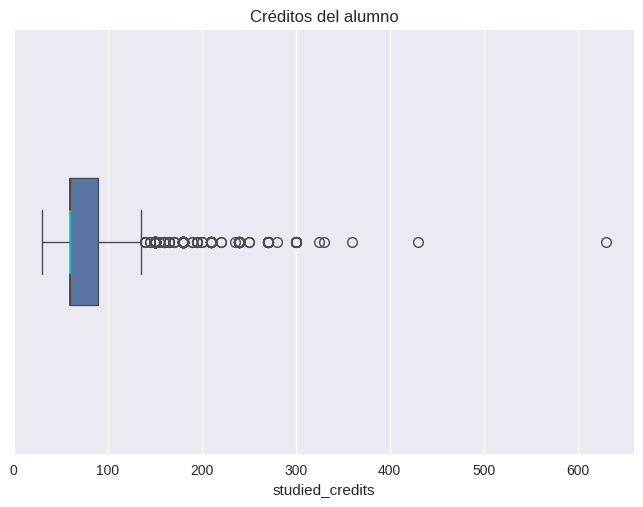

In [ ]:
sns.boxplot(x=df["studied_credits"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Créditos del alumno")

plt.show();

Observamos una inmensa mayoría de los datos repartidos en el rango entre 0 y 100 créditos, con la media cercana a 60. Tenemos muchos valores outliers por la derecha concentrados entre 120 y 300 créditos, después de ese rango hay muy pocos outliers.

In [ ]:
df["disability"].unique()

array([0, 1])

<ipython-input-16-20283136516a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df["disability"].unique())


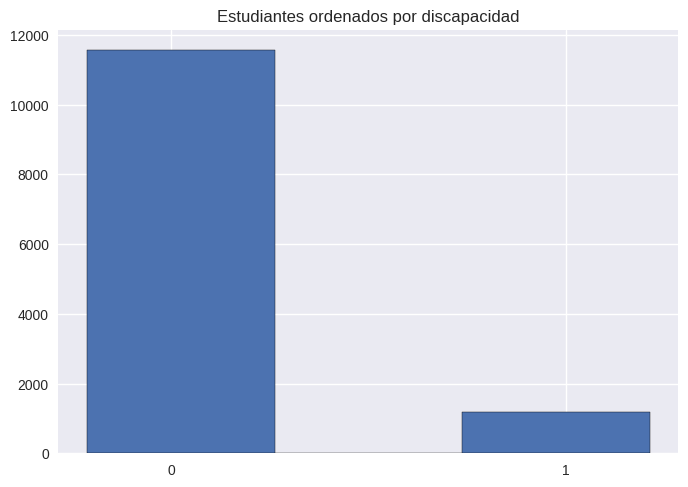

In [ ]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots()
df["disability"].hist(bins = 3, edgecolor="black")
ax.set_xticklabels(df["disability"].unique())
ax.set_xticks(ticks=[0.15, 0.85])
ax.set_title("Estudiantes ordenados por discapacidad")
plt.show();

Podemos ver que tenemos a la mayor parte de nuestros estudiantes en el conjunto 1, el que regularmente en una clasificación de este tipo indicaría que posee la condición, en este caso, discapacidad. Sin embargo, basado en las estadísticas de discacidad en Chile que hablan de un porcentaje de la población en sutuación de discapacidad del 9.8% ([Fuente](https://fundacioncontrabajo.cl/blog/cultura-inclusiva/discapacidad-en-chile/#:~:text=III%20ENDISC%2C%202022.-,Cifras%20de%20la%20poblaci%C3%B3n%20adulta%20en%20situaci%C3%B3n%20de%20dependencia%20por,la%20poblaci%C3%B3n%20total%20del%20pa%C3%ADs.)), vamos a considerar a los estudiantes del grupo uno como sin discapacidad y a los estudiantes del grupo cero con discapacidad. Esto lo vamos a hacer para efectos de trabajar los datos, ya que este supuesto puede llevar a error ya que la estadística podría no cumplirse, por ejemplo, si se trata de una escuela con foco en personas con discapacidad en cuyo caso tendría todo el sentido del mundo la repartiación de los datos de forma inversa.



<ipython-input-17-fa97ec984fe3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df["passed_course"].unique())


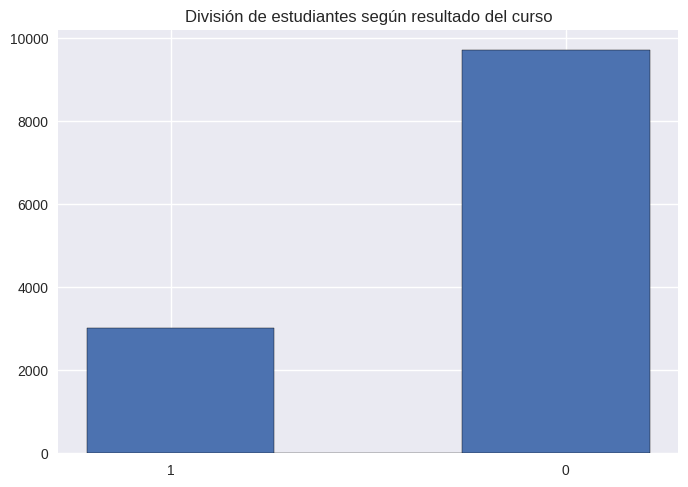

In [ ]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots()
df["passed_course"].hist(bins = 3, edgecolor="black")
ax.set_xticklabels(df["passed_course"].unique())
ax.set_xticks(ticks=[0.15, 0.85])
ax.set_title("División de estudiantes según resultado del curso")
plt.show();

Observamos que tenemos muchos más estudiantes con el curso reprobado que aprobado, asumiendo la clasificación explicada en la celda anterior. Vamos a mantener ese supuesto para este trabajo

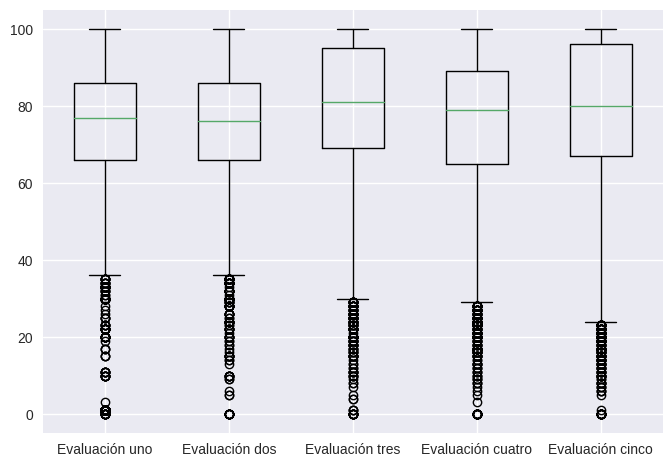

In [ ]:



my_dict = {'Evaluación uno': df["assess_score_1"], 'Evaluación dos': df["assess_score_2"],
           'Evaluación tres': df["assess_score_3"], 'Evaluación cuatro': df["assess_score_4"],
           'Evaluación cinco': df["assess_score_5"]}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.show();

Podemos observar rendimientos muy parecidos en todas las evaluaciones, donde se puede observar una tendencia al aumento en los puntajes altos y una reducción de los puntajes bajos a medida que aumenta el número de la evaluación, lo que nos podría indicara que estas evaluaciones son secuenciales y no paralelas.

Ahora vamos a modelar. Cabe decir que hay algunas formas en que se podrían mejorar estos datos para tener resultados más óptimos con el modelo(transformar la columna género a str en palabras y usar OHE, lo mismo con la columna disability), sin embargo, estas pruebas exceden el tiempo de este examen y se dejaran para otra ocasión.

In [ ]:
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC
set_config(display="diagram")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

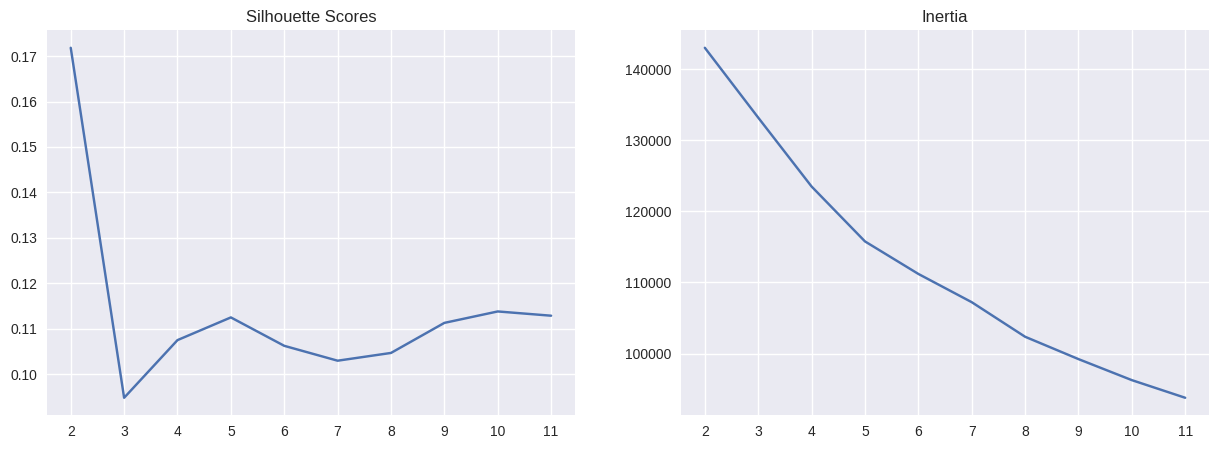

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,12)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(df_scaled)
  sils.append(silhouette_score(df_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks)
plt.show();

Podemos observar que nuestro silhouette score sugiere que usemos dos clusters mientras que el método del codo sugiere 5. El ideal sería probar con estas dos opciones, aunque es este caso usaremos inicialmente lo que propone el silhouette score.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42,n_init=10)
kmeans.fit(df_scaled)
df['cluster'] = kmeans.labels_
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,cluster
0,1,2,9,2,0,240,0,1,78,85,80,85,82,0
1,0,2,2,1,0,60,0,1,70,68,70,64,60,1
2,0,3,5,1,0,60,0,1,72,71,74,88,75,0
3,0,1,5,0,0,60,0,1,69,30,63,35,75,1
4,1,2,3,0,0,60,0,1,70,65,62,75,68,1


Obtengamos ahora las medias por cluster de cada característica

In [ ]:
cluster_groups1 = df.groupby('cluster', as_index=False)[["studied_credits", "assess_score_1","assess_score_2","assess_score_3", "assess_score_4", "assess_score_5"]].mean()
cluster_groups2 = df.groupby('cluster', as_index=False)[["gender", "highest_education","imd_band","age_band", "num_of_prev_attempts", "disability","passed_course"]].apply(lambda x: x.mode().iloc[0])

In [ ]:
cluster_groups2

,cluster,gender,highest_education,imd_band,age_band,num_of_prev_attempts,disability,passed_course
0,0,0,3,3,0,0,0,1
1,1,0,1,0,0,0,0,0


In [ ]:
cluster_groups1

,cluster,studied_credits,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,0,71.612291,79.680626,80.568039,86.634358,83.355084,86.302527
1,1,80.914578,62.852136,63.860028,66.234215,60.641365,62.100046


In [ ]:
cluster_groups2.drop(columns="cluster",inplace=True)

In [ ]:
cluster_groups = pd.concat([cluster_groups1, cluster_groups2], axis=1)

In [ ]:
cluster_groups

,cluster,studied_credits,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,gender,highest_education,imd_band,age_band,num_of_prev_attempts,disability,passed_course
0,0,71.612291,79.680626,80.568039,86.634358,83.355084,86.302527,0,3,3,0,0,0,1
1,1,80.914578,62.852136,63.860028,66.234215,60.641365,62.100046,0,1,0,0,0,0,0


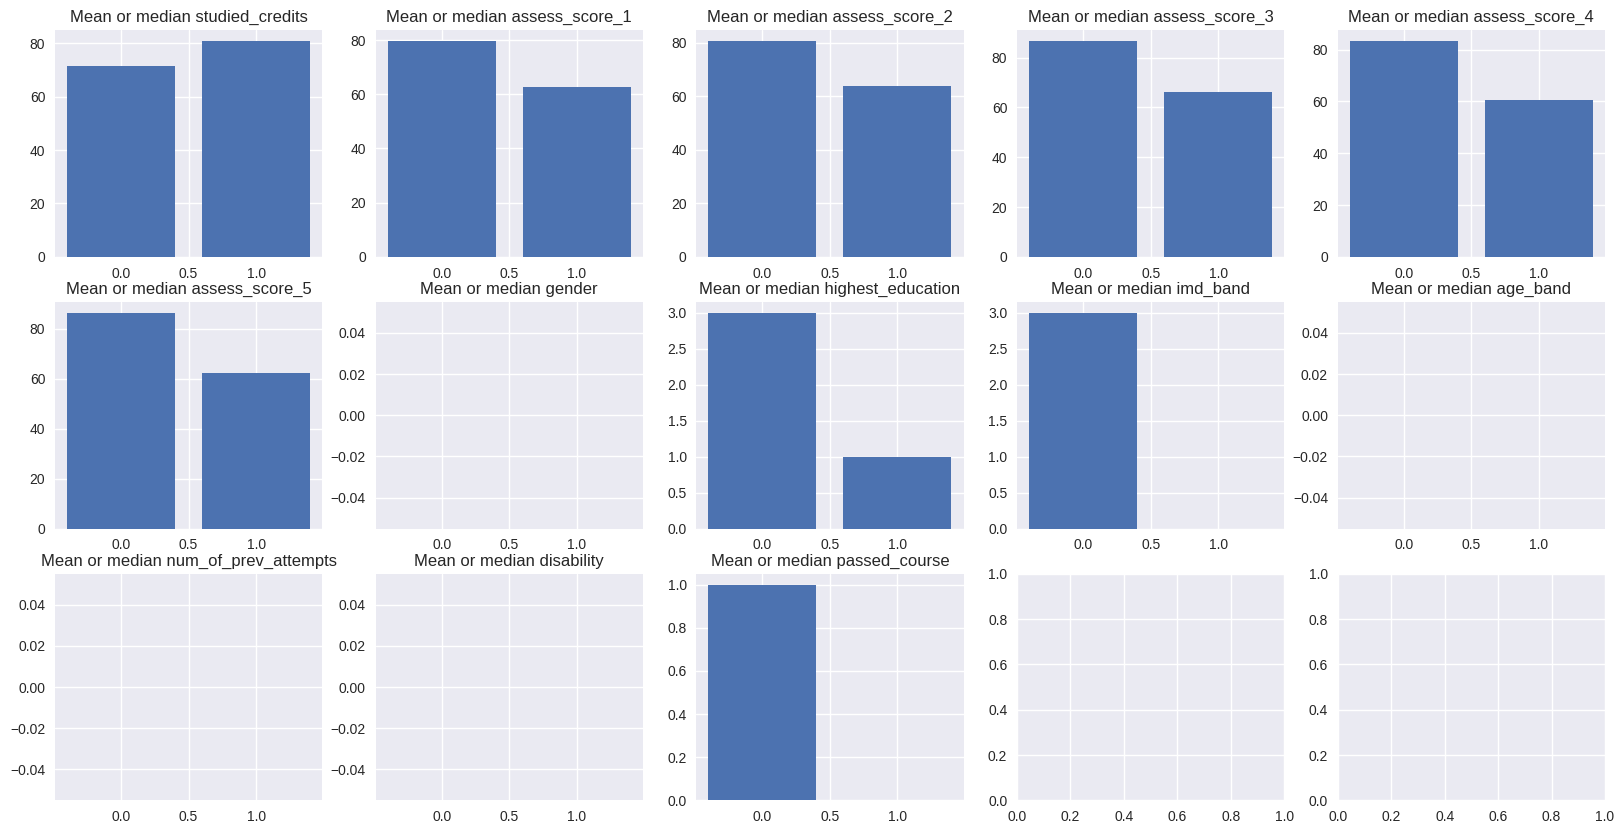

In [ ]:

fig, axes = plt.subplots(3,5, figsize = (20, 10))

axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean or median {col}')

Se observa que tenemos 4 columnas en las cuales ambos clusters tienen iguales valores, 0. Por este motivo y para mayor interpretabilidad es que vamos a omitir esas columnas de nuestra visualización

In [ ]:
cluster_groups.drop(columns=["gender","age_band","num_of_prev_attempts","disability"],inplace=True)

Realizamos el nuevo gráfico

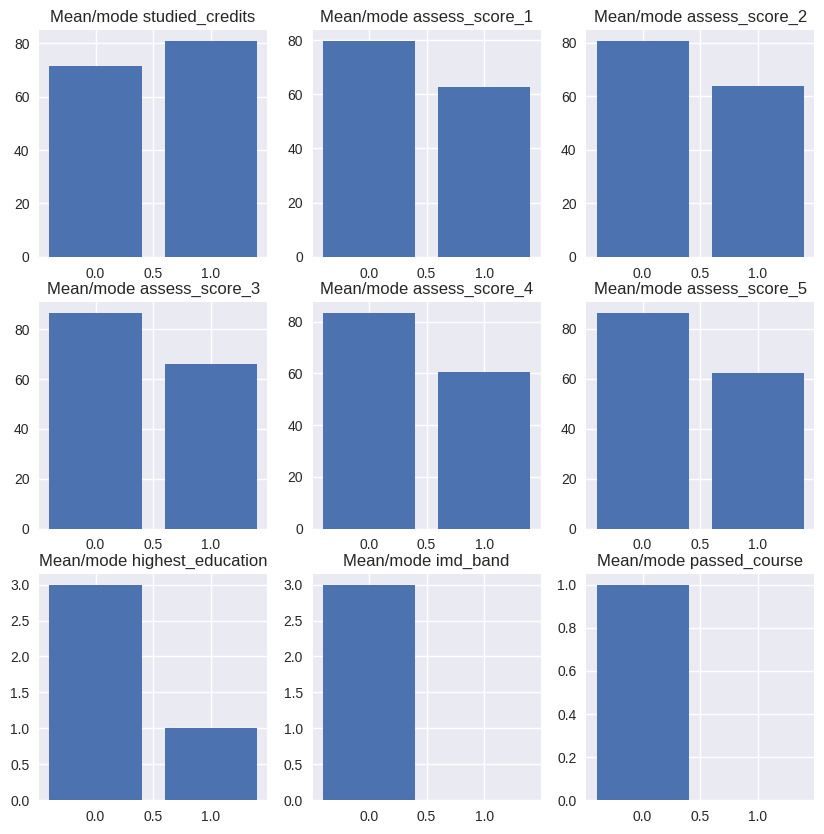

In [ ]:
# Visualize means
fig, axes = plt.subplots(3,3, figsize = (10, 10))

axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean/mode {col}')

Utilizamos para estos gráficos la media en las columnas cuyos valores tiene sentido que se promedien y la moda en aquellos cuya información nos sirve cuando en un número entero, ya que la información que nos sirve está relacionada al valor más común de esos valores

**Análisis de clusters**

Cluster 0: Este cluster presenta un nivel más alto de educación que su contraparte, dos niveles más arriba. Su índice de privación es mucho más alto, lo que habla de menos privación, relacionado a un nivel socioeconómico más alto y también mayor capital cultural, lo que se relaciona muy bien con los datos del nivel de educación, por eso no es sorpresa que este cluster tenga en su mayoría estudiantes que aprueban el curso.

Vemos también en este cluster que tienen menos créditos estudiados que podría referise a menos intentos para terminar el curso y también vemos que consistenemente en cada evaluación este cluster tiene mejores notas.


Cluster 1: Este cluster tiene en su mayoría estudiantes que no aprobaron. Podemos ver que en cada una de las evaluaciones tienen puntajes menores que los del otro cluster, y que tienen mayor cantidad de créditos que se puede asociar también a la toma de más cursos opcionales, lo que hablaría de estudiantes comprometidos pero que no logran los mejores puntajes y que reprueban. Esto podría explicarse dado su nivel de educación el cual es mucho más bajo que en el otro cluster, lo que podría mostrar que su nivel de preparación para enfrentar estos desafíos es menor y también podemos obser que su índice de privación es 0, lo cual nos habla de un nivel de privación altísimo, el más alto de la escala. Esto tiene un impacto en el estudiante, ya que las situaciones y la forma de vida también son determinantes a la hora de ver sus resultados académicos y eso queda de manifiesto al analizar estos clusters.


In [ ]:
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,cluster
0,1,2,9,2,0,240,0,1,78,85,80,85,82,0
1,0,2,2,1,0,60,0,1,70,68,70,64,60,1
2,0,3,5,1,0,60,0,1,72,71,74,88,75,0
3,0,1,5,0,0,60,0,1,69,30,63,35,75,1
4,1,2,3,0,0,60,0,1,70,65,62,75,68,1


Ahora vamos a crear un modelo para predecir si un estudiante aprobará el curso con otro dataset

In [ ]:
file = "/content/drive/MyDrive/Data Sets/Option_B_modeling.csv"
df= pd.read_csv(file)

In [ ]:
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,...,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
0,1,2,9,2,0,240,0,1,78.0,85.0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,2,1,0,60,0,1,70.0,68.0,...,0,0,0,0,0,0,0,1,0,0
2,0,3,5,1,0,60,0,1,72.0,71.0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,5,0,0,60,0,1,69.0,30.0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,3,0,0,60,0,1,70.0,65.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.isna().sum()[df.isna().sum()!=0]

Series([], dtype: int64)

In [ ]:
df.duplicated().sum()

0

Tenemos el dataset listo para modelar

In [ ]:
X=df.drop(columns="passed_course")
y=df["passed_course"]
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3, stratify=y, random_state=42)
X_test, X_val, y_test, y_val= train_test_split(X_test, y_test, test_size=0.66, random_state=42)

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
int_selector = make_column_selector(dtype_include='int')
float_selector = make_column_selector(dtype_include='float')

one_hot_encoder = OneHotEncoder()
standard_scaler = StandardScaler()

imputer_int= SimpleImputer(strategy='median')
imputer_float= SimpleImputer(strategy='mean')
imputer_cat= SimpleImputer(strategy='most_frequent')

col_transformer = make_column_transformer((make_pipeline(imputer_int, standard_scaler), int_selector),
                                          (make_pipeline(imputer_float,standard_scaler), float_selector),
                                          (make_pipeline(imputer_cat,one_hot_encoder), cat_selector),
                                          remainder = 'passthrough')

pca = PCA(n_components=.95)

pipeline=make_pipeline(col_transformer, pca)

pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4cf053b9a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImp...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4cf0539c90>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4cf053b940>)])),
                ('pca', PCA(n_components=0.95))])

In [ ]:
pipeline.fit(X_train)
X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)
X_val_processed = pipeline.transform(X_val)

In [ ]:
X_train_df = pd.DataFrame(X_train_processed, columns=pipeline.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_processed, columns=pipeline.get_feature_names_out())
X_val_df = pd.DataFrame(X_val_processed, columns=pipeline.get_feature_names_out())

In [ ]:
df.shape[1] - X_train_df.shape[1]

443

Las columnas bajaron casi a la mitad(443 columnas menos) manteniendo el 95% de la varianza

Ahora modelamos

In [ ]:
logreg = LogisticRegression(solver="newton-cholesky")

logreg.fit(X_train_df, y_train)

test_preds = logreg.predict(X_test_df)

test_score = accuracy_score(y_test, test_preds)

print("Reporte de clasificación para Regresor Logístico \n")
print(classification_report(y_test,test_preds))

Reporte de clasificación para Regresor Logístico 

              precision    recall  f1-score   support

           0       0.71      0.58      0.63       290
           1       0.88      0.93      0.91      1009

    accuracy                           0.85      1299
   macro avg       0.80      0.75      0.77      1299
weighted avg       0.84      0.85      0.85      1299



In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=11)

rfc.fit(X_train_df, y_train)

test_preds = rfc.predict(X_test_df)

test_score = accuracy_score(y_test, test_preds)

print("Reporte de clasificación para RandomForestClassifier \n")
print(classification_report(y_test,test_preds))

Reporte de clasificación para RandomForestClassifier 

              precision    recall  f1-score   support

           0       0.90      0.31      0.46       290
           1       0.83      0.99      0.90      1009

    accuracy                           0.84      1299
   macro avg       0.87      0.65      0.68      1299
weighted avg       0.85      0.84      0.81      1299



In [ ]:
svc = SVC()

svc.fit(X_train_df, y_train)

test_preds = svc.predict(X_test_df)

test_score = accuracy_score(y_test, test_preds)

print("Reporte de clasificación para Support Vector Machines \n")
print(classification_report(y_test,test_preds))

Reporte de clasificación para Support Vector Machines 

              precision    recall  f1-score   support

           0       0.85      0.52      0.65       290
           1       0.88      0.97      0.92      1009

    accuracy                           0.87      1299
   macro avg       0.86      0.75      0.78      1299
weighted avg       0.87      0.87      0.86      1299



In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_df, y_train)

test_preds = knn.predict(X_test_df)

test_score = accuracy_score(y_test, test_preds)

print("Reporte de clasificación para k-Nearest Neighbors \n")
print(classification_report(y_test,test_preds))

Reporte de clasificación para k-Nearest Neighbors 

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       290
           1       0.88      0.91      0.89      1009

    accuracy                           0.83      1299
   macro avg       0.76      0.73      0.74      1299
weighted avg       0.82      0.83      0.83      1299



In [ ]:
xgbc = xgb.XGBClassifier(n_estimators=432, max_depth=11)

xgbc.fit(X_train_df, y_train)

test_preds = xgbc.predict(X_test_df)

test_score = accuracy_score(y_test, test_preds)

print("Reporte de clasificación para Gradient Boosting  \n")
print(classification_report(y_test,test_preds))

Reporte de clasificación para Gradient Boosting  

              precision    recall  f1-score   support

           0       0.85      0.51      0.64       290
           1       0.87      0.97      0.92      1009

    accuracy                           0.87      1299
   macro avg       0.86      0.74      0.78      1299
weighted avg       0.87      0.87      0.86      1299



Vamos a comparar nuestros modelos utilizando el score de accuracy:

                               
*   Gradient Boosting      :   0.87
*   Support Vector Machines:   0.87
*   Regresor Logístico     :   0.85
*   RandomForestClassifier :   0.84
*   K-Nearest Neighbors    :   0.83









Ya tenemos números de nuestros mejores modelos para comparar con nuestras redes de aprendizaje profundo

Ahora con redes neuronales

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
df.shape[1]

931

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(931, input_dim = 930, activation='relu'))
model.add(tf.keras.layers.Dense(831, activation='relu'))
model.add(tf.keras.layers.Dense(731, activation='relu'))
model.add(tf.keras.layers.Dense(631, activation='relu'))
model.add(tf.keras.layers.Dense(531, activation='relu'))
model.add(tf.keras.layers.Dense(431, activation='relu'))
model.add(tf.keras.layers.Dense(331, activation='relu'))
model.add(tf.keras.layers.Dense(231, activation='relu'))
model.add(tf.keras.layers.Dense(131, activation='relu'))
model.add(tf.keras.layers.Dense(31, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=33, batch_size=999,
                    validation_data=(X_val, y_val))

Epoch 1/33
9/9 [==============================] - 6s 395ms/step - loss: 20.9917 - accuracy: 0.5979 - val_loss: 4.6114 - val_accuracy: 0.2438
Epoch 2/33
9/9 [==============================] - 3s 358ms/step - loss: 1.6971 - accuracy: 0.6435 - val_loss: 1.4286 - val_accuracy: 0.7562
Epoch 3/33
9/9 [==============================] - 4s 439ms/step - loss: 0.8448 - accuracy: 0.6922 - val_loss: 0.8886 - val_accuracy: 0.7562
Epoch 4/33
9/9 [==============================] - 4s 436ms/step - loss: 0.6752 - accuracy: 0.7630 - val_loss: 0.6401 - val_accuracy: 0.7535
Epoch 5/33
9/9 [==============================] - 3s 355ms/step - loss: 0.5912 - accuracy: 0.7626 - val_loss: 0.6269 - val_accuracy: 0.7562
Epoch 6/33
9/9 [==============================] - 3s 356ms/step - loss: 0.5495 - accuracy: 0.7632 - val_loss: 0.5862 - val_accuracy: 0.7566
Epoch 7/33
9/9 [==============================] - 4s 478ms/step - loss: 0.5150 - accuracy: 0.7637 - val_loss: 0.5669 - val_accuracy: 0.7554
Epoch 8/33
9/9 [===

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 931)               866761    
                                                                 
 dense_1 (Dense)             (None, 831)               774492    
                                                                 
 dense_2 (Dense)             (None, 731)               608192    
                                                                 
 dense_3 (Dense)             (None, 631)               461892    
                                                                 
 dense_4 (Dense)             (None, 531)               335592    
                                                                 
 dense_5 (Dense)             (None, 431)               229292    
                                                                 
 dense_6 (Dense)             (None, 331)               1

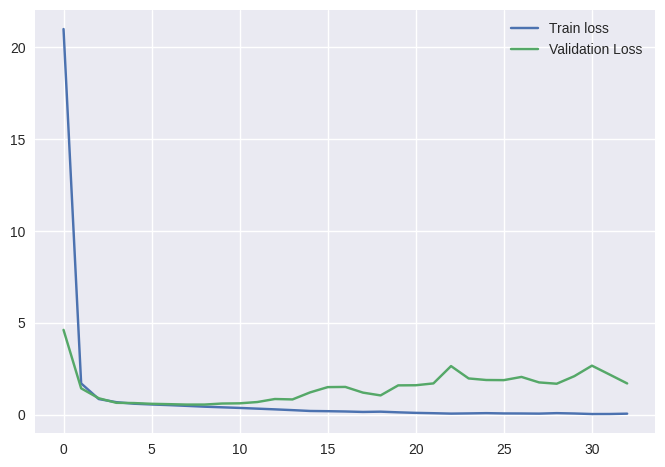

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

Podemos que este modelo comenzó muy pronto a dar señales de overfitting, por lo que requiere algunos ajustes

In [ ]:
loss, acc = model.evaluate(X_test, y_test,
                            batch_size=32)
print("Loss:", loss)
print("Accuracy:", acc)

41/41 [==============================] - 1s 15ms/step - loss: 1.4086 - accuracy: 0.8075
Loss: 1.4086110591888428
Accuracy: 0.8075442910194397


Nuestra primera red neuronal nos está entregando un accuracy de 82% mientras que los dos mejores modelos de Machine Learning(SVC & XGBClassifier) nos dieron un 87% de la misma métrica

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(931, input_dim = 930, activation='relu'))
model.add(tf.keras.layers.Dense(901, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(871, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(841, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(811, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(781, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(751, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(721, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(681, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(651, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(631, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(601, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(571, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(541, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(511, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(481, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(451, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(421, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(391, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(361, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(331, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(301, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(271, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(241, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(211, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(181, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(151, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(121, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(91, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(61, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(31, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(16, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(8, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(4, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(2, activation='relu',kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=33, batch_size=999,
                    validation_data=(X_val, y_val))

Epoch 1/33
9/9 [==============================] - 18s 1s/step - loss: 12.9501 - accuracy: 0.7076 - val_loss: 10.4302 - val_accuracy: 0.7562
Epoch 2/33
9/9 [==============================] - 11s 1s/step - loss: 8.8185 - accuracy: 0.7631 - val_loss: 6.9966 - val_accuracy: 0.7562
Epoch 3/33
9/9 [==============================] - 11s 1s/step - loss: 5.8576 - accuracy: 0.7631 - val_loss: 4.5904 - val_accuracy: 0.7562
Epoch 4/33
9/9 [==============================] - 9s 1s/step - loss: 3.8675 - accuracy: 0.7631 - val_loss: 3.0870 - val_accuracy: 0.7562
Epoch 5/33
9/9 [==============================] - 11s 1s/step - loss: 2.6237 - accuracy: 0.7631 - val_loss: 2.1407 - val_accuracy: 0.7562
Epoch 6/33
9/9 [==============================] - 11s 1s/step - loss: 1.8538 - accuracy: 0.7631 - val_loss: 1.5594 - val_accuracy: 0.7562
Epoch 7/33
9/9 [==============================] - 11s 1s/step - loss: 1.3839 - accuracy: 0.7631 - val_loss: 1.2098 - val_accuracy: 0.7562
Epoch 8/33
9/9 [=================

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 931)               866761    
                                                                 
 dense_12 (Dense)            (None, 901)               839732    
                                                                 
 dense_13 (Dense)            (None, 871)               785642    
                                                                 
 dense_14 (Dense)            (None, 841)               733352    
                                                                 
 dropout (Dropout)           (None, 841)               0         
                                                                 
 dense_15 (Dense)            (None, 811)               682862    
                                                                 
 dense_16 (Dense)            (None, 781)              

In [ ]:
loss, acc = model.evaluate(X_test, y_test,
                            batch_size=32)
print("Loss:", loss) # Función de pérdida
print("Accuracy:", acc)

41/41 [==============================] - 2s 37ms/step - loss: 0.5518 - accuracy: 0.7768
Loss: 0.5518171191215515
Accuracy: 0.7767513394355774


El accuracy bajó, esto debería indicar que logramos regularizar la pérdida. Veamos

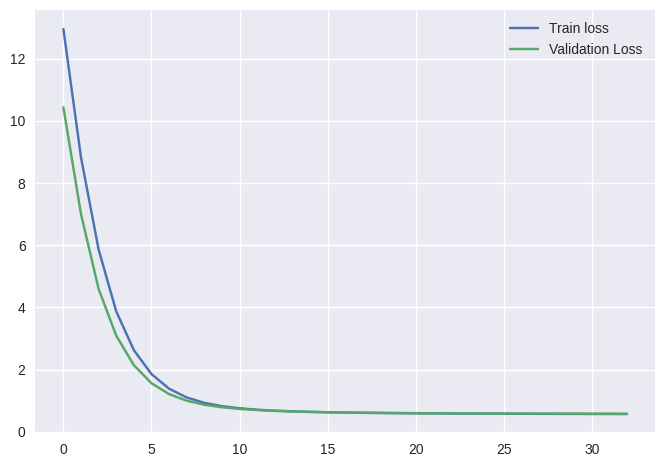

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

Hemos logrado eliminar toda tendencia de overfit, por lo que podemos ahora aumentar la complejidad de nuestro modelo

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(930, input_dim = 930, activation='relu'))
model.add(tf.keras.layers.Dense(925, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.Dense(920, activation='relu'))
model.add(tf.keras.layers.Dense(915, activation='relu'))
model.add(tf.keras.layers.Dense(910, activation='relu'))
model.add(tf.keras.layers.Dense(905, activation='relu'))
model.add(tf.keras.layers.Dense(900, activation='relu'))
model.add(tf.keras.layers.Dense(895, activation='relu'))
model.add(tf.keras.layers.Dense(890, activation='relu'))
model.add(tf.keras.layers.Dense(885, activation='relu'))
model.add(tf.keras.layers.Dense(880, activation='relu'))
model.add(tf.keras.layers.Dense(875, activation='relu'))
model.add(tf.keras.layers.Dense(870, activation='relu'))
model.add(tf.keras.layers.Dense(865, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.Dense(860, activation='relu'))
model.add(tf.keras.layers.Dense(855, activation='relu'))
model.add(tf.keras.layers.Dense(850, activation='relu'))
model.add(tf.keras.layers.Dense(845, activation='relu'))
model.add(tf.keras.layers.Dense(840, activation='relu'))
model.add(tf.keras.layers.Dense(835, activation='relu'))
model.add(tf.keras.layers.Dense(830, activation='relu'))
model.add(tf.keras.layers.Dense(825, activation='relu'))
model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(820, activation='relu'))
model.add(tf.keras.layers.Dense(815, activation='relu'))
model.add(tf.keras.layers.Dense(810, activation='relu'))
model.add(tf.keras.layers.Dense(805, activation='relu'))
model.add(tf.keras.layers.Dense(800, activation='relu'))
model.add(tf.keras.layers.Dense(810, activation='relu'))
model.add(tf.keras.layers.Dense(805, activation='relu'))
model.add(tf.keras.layers.Dense(800, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.Dense(790, activation='relu'))
model.add(tf.keras.layers.Dense(785, activation='relu'))
model.add(tf.keras.layers.Dense(780, activation='relu'))
model.add(tf.keras.layers.Dense(766, activation='relu'))
model.add(tf.keras.layers.Dense(751, activation='relu'))
model.add(tf.keras.layers.Dense(736, activation='relu'))
model.add(tf.keras.layers.Dense(721, activation='relu'))
model.add(tf.keras.layers.Dense(706, activation='relu'))
model.add(tf.keras.layers.Dense(691, activation='relu'))
model.add(tf.keras.layers.Dense(676, activation='relu'))
model.add(tf.keras.layers.Dense(661, activation='relu'))
model.add(tf.keras.layers.Dense(646, activation='relu'))
model.add(tf.keras.layers.Dense(631, activation='relu'))
model.add(tf.keras.layers.Dense(616, activation='relu'))
model.add(tf.keras.layers.Dense(601, activation='relu'))
model.add(tf.keras.layers.Dense(586, activation='relu'))
model.add(tf.keras.layers.Dense(571, activation='relu'))
model.add(tf.keras.layers.Dense(556, activation='relu'))
model.add(tf.keras.layers.Dense(541, activation='relu'))
model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(526, activation='relu'))
model.add(tf.keras.layers.Dense(511, activation='relu'))
model.add(tf.keras.layers.Dense(496, activation='relu'))
model.add(tf.keras.layers.Dense(481, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.Dense(466, activation='relu'))
model.add(tf.keras.layers.Dense(451, activation='relu'))
model.add(tf.keras.layers.Dense(421, activation='relu'))
model.add(tf.keras.layers.Dense(436, activation='relu'))
model.add(tf.keras.layers.Dense(421, activation='relu'))
model.add(tf.keras.layers.Dense(406, activation='relu'))
model.add(tf.keras.layers.Dense(391, activation='relu'))
model.add(tf.keras.layers.Dense(376, activation='relu'))
model.add(tf.keras.layers.Dense(361, activation='relu'))
model.add(tf.keras.layers.Dense(346, activation='relu'))
model.add(tf.keras.layers.Dense(331, activation='relu'))
model.add(tf.keras.layers.Dense(316, activation='relu'))
model.add(tf.keras.layers.Dense(301, activation='relu'))
model.add(tf.keras.layers.Dense(286, activation='relu'))
model.add(tf.keras.layers.Dense(271, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(241, activation='relu'))
model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(226, activation='relu'))
model.add(tf.keras.layers.Dense(211, activation='relu'))
model.add(tf.keras.layers.Dense(196, activation='relu'))
model.add(tf.keras.layers.Dense(181, activation='relu'))
model.add(tf.keras.layers.Dense(166, activation='relu'))
model.add(tf.keras.layers.Dense(151, activation='relu'))
model.add(tf.keras.layers.Dense(136, activation='relu'))
model.add(tf.keras.layers.Dense(121, activation='relu'))
model.add(tf.keras.layers.Dense(106, activation='relu'))
model.add(tf.keras.layers.Dense(91, activation='relu'))
model.add(tf.keras.layers.Dense(76, activation='relu'))
model.add(tf.keras.layers.Dense(61, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='relu'))
model.add(tf.keras.layers.Dense(31, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=33, batch_size=999,
                    validation_data=(X_val, y_val))

Epoch 1/33
9/9 [==============================] - 52s 4s/step - loss: 0.9572 - accuracy: 0.7033 - val_loss: 0.9015 - val_accuracy: 0.7562
Epoch 2/33
9/9 [==============================] - 36s 4s/step - loss: 0.8635 - accuracy: 0.7631 - val_loss: 0.8204 - val_accuracy: 0.7562
Epoch 3/33
9/9 [==============================] - 38s 4s/step - loss: 0.7936 - accuracy: 0.7631 - val_loss: 0.7641 - val_accuracy: 0.7562
Epoch 4/33
9/9 [==============================] - 38s 4s/step - loss: 0.7465 - accuracy: 0.7631 - val_loss: 0.7278 - val_accuracy: 0.7562
Epoch 5/33
9/9 [==============================] - 35s 4s/step - loss: 0.7167 - accuracy: 0.7631 - val_loss: 0.7053 - val_accuracy: 0.7562
Epoch 6/33
9/9 [==============================] - 39s 4s/step - loss: 0.6984 - accuracy: 0.7631 - val_loss: 0.6918 - val_accuracy: 0.7562
Epoch 7/33
9/9 [==============================] - 38s 4s/step - loss: 0.6875 - accuracy: 0.7631 - val_loss: 0.6836 - val_accuracy: 0.7562
Epoch 8/33
9/9 [==================

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_403 (Dense)           (None, 930)               865830    
                                                                 
 dense_404 (Dense)           (None, 925)               861175    
                                                                 
 dense_405 (Dense)           (None, 920)               851920    
                                                                 
 dense_406 (Dense)           (None, 915)               842715    
                                                                 
 dense_407 (Dense)           (None, 910)               833560    
                                                                 
 dense_408 (Dense)           (None, 905)               824455    
                                                                 
 dense_409 (Dense)           (None, 900)              

In [ ]:
loss, acc = model.evaluate(X_test, y_test,
                            batch_size=32)
print("Loss:", loss)
print("Accuracy:", acc)

41/41 [==============================] - 3s 70ms/step - loss: 0.6259 - accuracy: 0.7768
Loss: 0.6258991956710815
Accuracy: 0.7767513394355774


Podemos ver que hemos generado una baja en nuestra capacidad de predecir, por eso, hay que seguir ajustando nuestra red neuronal para llegar a los resultados esperados. De todos modos, por ahora podemos quedarnos con nuestro modelo anterior que consiguió mejores resultados.

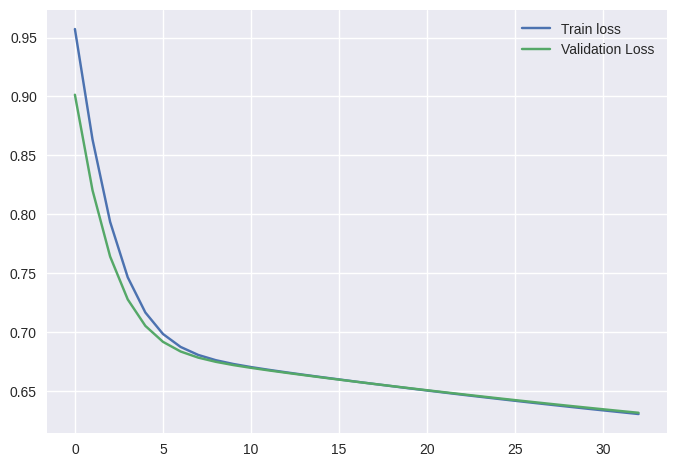

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();